In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [36]:
df_sales_month = pd.read_csv('sales.csv')
df_sales_month['calmonth'] = df_sales_month['calmonth'].astype(str)
df_sales_month['year'] = df_sales_month['calmonth'].str[:4]
df_sales_month['month'] = df_sales_month['calmonth'].str[4:6]
df_sales_month = df_sales_month.drop(columns=['calmonth'])
df_sales_month

,cooler_id,customer_id,amount,year,month
0,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,76.8887,2025,03
1,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,131.0627,2024,12
2,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,180.8420,2024,07
3,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,82.3243,2025,02
4,42d9b14c937541b8f1287ce7251d1e29f1f8eb58dbcd7e...,e21b830bc395b5a355f68a698c55ad95474f929d8e2521...,201.7541,2023,10
...,...,...,...,...,...
204731,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,021ce98d216fdee3533129eb75d956978858eade78d6a4...,1244.2283,2025,04
204732,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,021ce98d216fdee3533129eb75d956978858eade78d6a4...,1829.9476,2023,06
204733,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,021ce98d216fdee3533129eb75d956978858eade78d6a4...,396.8060,2023,04
204734,661cc6a46677515e7801eda42d84b6242778a9d77f6062...,021ce98d216fdee3533129eb75d956978858eade78d6a4...,1818.3142,2024,06


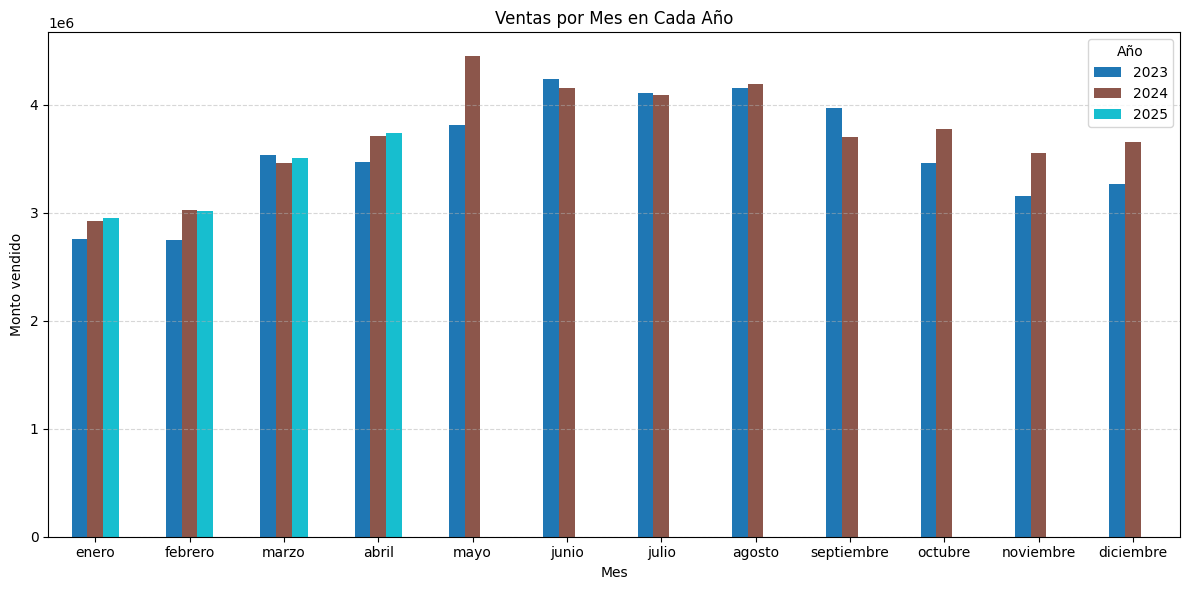

In [39]:
months = calendar.month_name
# Usar sales_month para graficar ventas por mes en cada año

# Crear tabla pivote: filas=mes, columnas=año, valores=amount
pivot = df_sales_month.pivot_table(index='month', columns='year', values='amount', aggfunc='sum')

# Ordenar los meses correctamente
pivot = pivot.reindex([f"{i:02d}" for i in range(1, 13)])

# Graficar
pivot.plot(kind='bar', figsize=(12,6), colormap='tab10')

# Ajustes visuales
plt.title('Ventas por Mes en Cada Año')
plt.xlabel('Mes')
plt.ylabel('Monto vendido')
plt.xticks(ticks=range(12), labels=months[1:], rotation=0)
plt.legend(title='Año')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
